In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from main_functions import create_data, create_dummy_variables, chi_squared_test, combine_dataframes, plot_correlation_heatmap, binary_logistic_regression

data = create_data()

# 1. Introducción

En este análisis, nuestro objetivo es desarrollar un modelo predictivo que permita identificar de manera efectiva qué clientes de un banco tienen una alta probabilidad de pagar un crédito. Para ello, hemos realizado un Análisis Exploratorio de Datos (EDA) detallado y aplicado técnicas de modelado avanzado.

La variable objetivo de nuestro análisis es `credit_risk`, que es una variable binomial donde:
- **1** indica que el cliente tiene un buen crédito (es decir, es probable que pague el crédito).
- **0** indica que el cliente tiene un mal crédito (es decir, es probable que no pague el crédito).

El propósito de este modelo es mejorar la capacidad del banco para evaluar el riesgo crediticio de sus clientes, optimizando así la toma de decisiones en la concesión de créditos. A través de este análisis, buscamos identificar los factores más influyentes que determinan el riesgo crediticio y mejorar la precisión de las predicciones actuales.

# 2. Descripción del Conjunto de Datos

El conjunto de datos utilizado para este análisis contiene tanto variables categóricas como numéricas, y una variable objetivo binomial. A continuación, se presenta una descripción detallada de las variables:

## Variables Numéricas

- **`duration`**: Tiempo en meses del crédito.
  - **Media**: 24.86
  - **Desviación Estándar**: 13.28

- **`amount`**: Monto del crédito en DM.
  - **Media**: 3938.13
  - **Desviación Estándar**: 3535.82

- **`age`**: Edad del cliente en años.
  - **Media**: 33.96
  - **Desviación Estándar**: 11.23

## Variables Categóricas

El conjunto de datos incluye varias variables categóricas que describen características demográficas y financieras de los clientes. Estas variables incluyen:

- **`status`**: Estado de la cuenta corriente.
- **`credit_history`**: Historial de crédito.
- **`purpose`**: Propósito del crédito.
- **`savings`**: Ahorros.
- **`employment_duration`**: Duración del empleo.
- **... (y otras variables categóricas similares)**

Cada una de estas variables tiene múltiples categorías que describen diferentes estados o condiciones. Estas categorías se han codificado en variables dummies para el análisis.

- **`credit_risk`** (`kredit`): Riesgo crediticio.
  - 0: Mal crédito
  - 1: Buen crédito

La variable objetivo `credit_risk` es binomial y representa la calidad del crédito de un cliente. Un valor de **1** indica que el cliente tiene un buen crédito y es probable que pague su crédito, mientras que un valor de **0** indica un mal crédito, sugiriendo que es probable que el cliente no pague su crédito.


# 3. Preprocesamiento de Datos

## Conversión de Variables Categóricas a Variables Dummies

Para preparar las variables categóricas para el análisis, utilizamos una función personalizada llamada `create_dummy_variables`, que se basa en la funcionalidad de `pandas` para crear variables dummies. Esta función nos permite transformar las variables categóricas en un formato numérico adecuado para el modelado.

### Decisiones Estadísticas
- **Razonamiento**: Las variables categóricas deben ser convertidas a un formato numérico para ser utilizadas en modelos de machine learning. La codificación de variables dummies es una técnica estándar que evita la introducción de un orden artificial en las categorías.

### Implementación
- **Función `create_dummy_variables`**: Esta función toma como entrada el conjunto de datos, la columna categórica a transformar, y la columna objetivo. Genera variables dummies para la columna categórica y las concatena con la variable objetivo, preparándolas para el análisis posterior.

```python
def create_dummy_variables(data, categorical_column, target_column):
    # Crear variables dummy a partir de la columna categórica
    dummies = pd.get_dummies(data[categorical_column], prefix=categorical_column, drop_first=False)
    
    # Concatenar las variables dummy con la columna objetivo
    new_data = pd.concat([pd.get_dummies(data[[target_column]], drop_first=True), dummies], axis=1)
    
    return new_data

# 4. Análisis Estadístico

Realizamos pruebas chi-cuadrado para evaluar la independencia entre las variables categóricas transformadas y la variable objetivo `credit_risk`. Esta prueba nos permite identificar si existe una relación significativa entre las categorías de las variables y el riesgo crediticio.

## Prueba Chi-Cuadrado

Utilizamos la función `chi_squared_test` para realizar pruebas chi-cuadrado en las variables dummies generadas a partir de las variables categóricas. Esta función calcula la estadística chi-cuadrado y el valor p para cada variable dummy, lo que nos ayuda a determinar la significancia estadística de las relaciones observadas.

### Implementación

A continuación, se muestra cómo aplicamos la prueba chi-cuadrado a la variable `savings`:

```python
dummy_savings_data = create_dummy_variables(data, 'savings', 'credit_risk')
chi_squared_results = chi_squared_test(dummy_savings_data, 'credit_risk_1')


### Código para Agrupar Resultados en una Tabla

El código proporcionado convierte los resultados almacenados en un diccionario a un DataFrame de `pandas`, lo que facilita la visualización y el análisis de los resultados de las pruebas chi-cuadrado. Puedes ejecutar este código después de obtener los resultados de `chi_squared_test` para ver la tabla en tu notebook.

Este enfoque te permite presentar de manera clara y concisa los resultados del análisis estadístico, destacando las relaciones significativas que pueden influir en el modelado posterior. Si necesitas más ayuda o deseas ajustar algo, házmelo saber.

In [2]:
import pandas as pd


In [3]:
dummy_status_data = create_dummy_variables(data, 'status', 'credit_risk')
dummy_credit_history_data = create_dummy_variables(data, 'credit_history', 'credit_risk')
dummy_purpose_data = create_dummy_variables(data, 'purpose', 'credit_risk')
dummy_savings_data = create_dummy_variables(data, 'savings', 'credit_risk')
dummy_personal_status_sex_data = create_dummy_variables(data, 'personal_status_sex', 'credit_risk')
chi_squared_df = pd.DataFrame.from_dict(
    {
        **chi_squared_test(dummy_status_data, 'credit_risk_1'),
        **chi_squared_test(dummy_credit_history_data, 'credit_risk_1'),
        **chi_squared_test(dummy_purpose_data, 'credit_risk_1'),
        **chi_squared_test(dummy_savings_data, 'credit_risk_1'),
        **chi_squared_test(dummy_personal_status_sex_data, 'credit_risk_1'),

     }, 
    orient='index')
chi_squared_df

,chi2_statistic,p_value
status_1,65.478225,5.875962e-16
status_2,13.717184,2.125012e-04
status_3,1.561730,2.114121e-01
status_4,102.529814,4.249243e-24
credit_history_0,19.376240,1.073342e-05
credit_history_1,16.742644,4.280790e-05
credit_history_2,1.725259,1.890176e-01
credit_history_3,0.071794,7.887423e-01
credit_history_4,32.154138,1.424130e-08
purpose_0,8.896891,2.856567e-03


In [4]:
dummy_other_installment_plans_data = create_dummy_variables(data, 'other_installment_plans', 'credit_risk')
dummy_housing_data = create_dummy_variables(data, 'housing', 'credit_risk')
dummy_foreign_worker_data = create_dummy_variables(data, 'foreign_worker', 'credit_risk')
dummy_employment_duration_data = create_dummy_variables(data, 'employment_duration', 'credit_risk')
dummy_installment_rate_data = create_dummy_variables(data, 'installment_rate', 'credit_risk')
chi_squared_df = pd.DataFrame.from_dict(
    {
        **chi_squared_test(dummy_other_installment_plans_data, 'credit_risk_1'),
        **chi_squared_test(dummy_housing_data, 'credit_risk_1'),
        **chi_squared_test(dummy_foreign_worker_data, 'credit_risk_1'),
        **chi_squared_test(dummy_employment_duration_data, 'credit_risk_1'),
        **chi_squared_test(dummy_installment_rate_data, 'credit_risk_1')

    },
    orient='index'
)
chi_squared_df

,chi2_statistic,p_value
other_installment_plans_1,8.715377,0.003155
other_installment_plans_2,2.058237,0.151385
other_installment_plans_3,12.206069,0.000476
housing_1,8.089072,0.004453
housing_2,17.892705,0.000023
housing_3,6.476721,0.010930
foreign_worker_1,5.821576,0.015831
foreign_worker_2,5.821576,0.015831
employment_duration_1,1.245419,0.264429
employment_duration_2,10.713416,0.001064


### Resultados

Los resultados de las pruebas chi-cuadrado se agruparon en una tabla que muestra la estadística chi-cuadrado y el valor p para cada variable dummy. Un valor p bajo (por lo general, menor a 0.05) indica que existe una relación significativa entre la variable dummy y la variable objetivo.

Variables Significativas
A partir de los resultados de las pruebas chi-cuadrado, identificamos las siguientes variables como significativamente relacionadas con el riesgo crediticio:

- status_1
- status_2
- status_4
- credit_history_0
- credit_history_1
- credit_history_4
- purpose_0
- purpose_1
- purpose_3
- purpose_6
- savings_1
- savings_3
- savings_4
- savings_5
- personal_status_sex_2
- personal_status_sex_3
- other_installment_plans_1
- other_installment_plans_3
- housing_1
- housing_2
- housing_3
- foreign_worker_1
- foreign_worker_2
- employment_duration_2
- employment_duration_4
- installment_rate_4

Estas variables serán consideradas en el análisis y modelado posterior, ya que muestran una relación significativa con la variable objetivo credit_risk.


# 5. Análisis de Correlación y Modelado

En esta sección, exploramos las correlaciones entre las variables significativas identificadas y procedemos a ajustar un modelo de regresión logística para predecir el riesgo crediticio.

## Análisis de Correlación

Para identificar y remover variables altamente correlacionadas, generamos un mapa de calor de las correlaciones entre las variables significativas. Esto nos ayuda a evitar la multicolinealidad en el modelo de regresión logística.

### Implementación

Utilizamos la función `plot_correlation_heatmap` para visualizar las correlaciones:

```python
plot_correlation_heatmap(full_dummy_significant_subset[significant_variables], (20, 15))

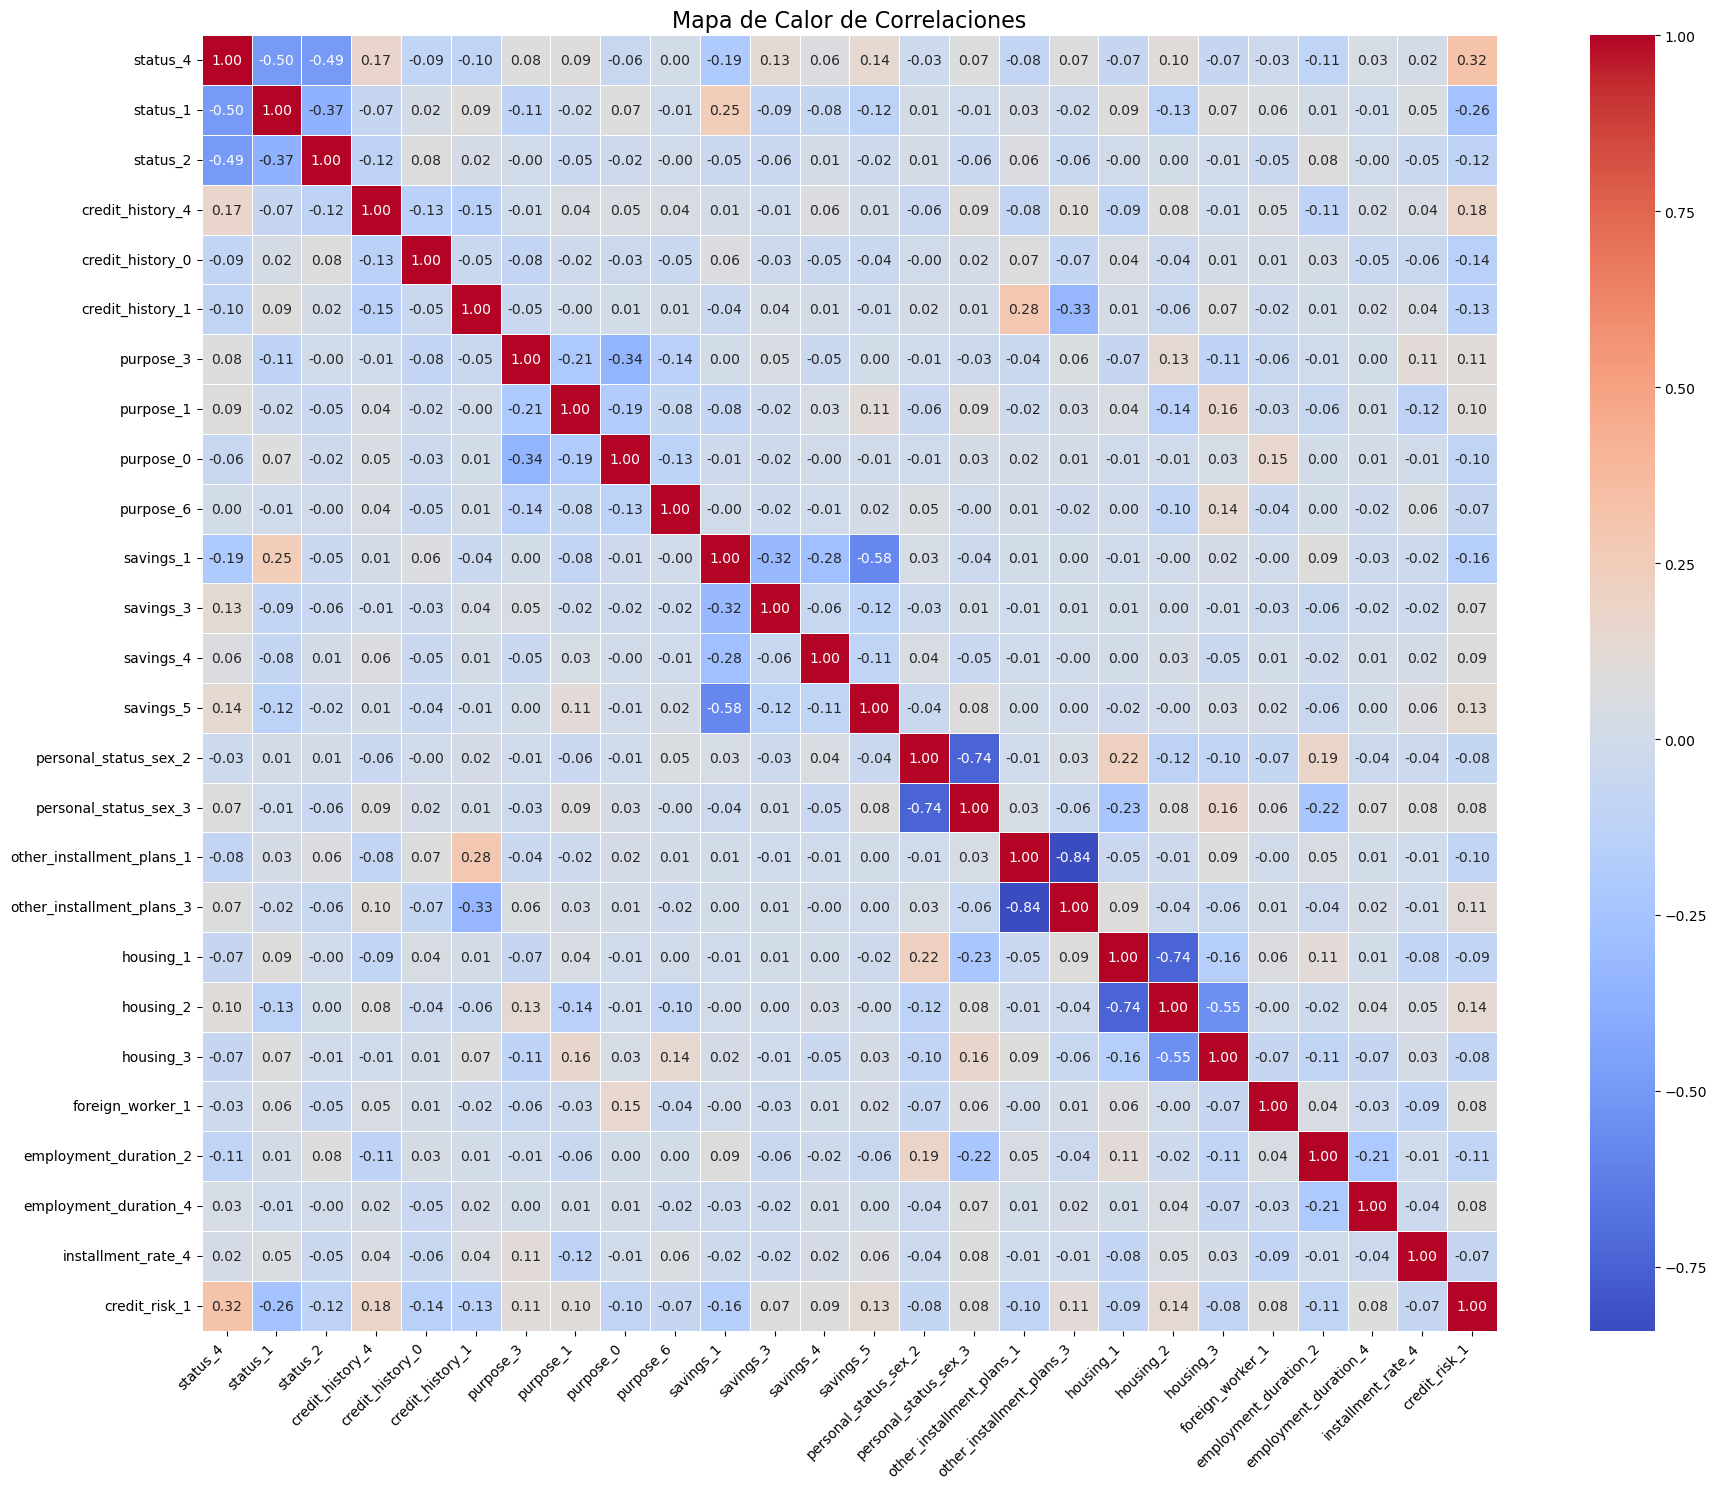

In [5]:
full_dummy_significant_subset = combine_dataframes([
    dummy_status_data[['status_4', 'status_1', 'status_2']],
    dummy_credit_history_data[['credit_history_4','credit_history_0', 'credit_history_1']],
    dummy_purpose_data[['purpose_3','purpose_1','purpose_0', 'purpose_6']],
    dummy_savings_data[['savings_1', 'savings_3', 'savings_4', 'savings_5']],
    dummy_personal_status_sex_data[['personal_status_sex_2', 'personal_status_sex_3']],
    dummy_other_installment_plans_data[['other_installment_plans_1', 'other_installment_plans_3']],
    dummy_housing_data[['housing_1', 'housing_2', 'housing_3']],
    dummy_foreign_worker_data[['foreign_worker_1']],
    dummy_employment_duration_data[['employment_duration_2', 'employment_duration_4']],
    dummy_installment_rate_data[['installment_rate_4', 'credit_risk_1']]
], axis=1, ignore_index=False)

plot_correlation_heatmap(full_dummy_significant_subset, (20, 15))


### Variables Altamente Correlacionadas

A partir del mapa de calor, identificamos las siguientes parejas de variables con alta correlación:

- `status_4` - `status_1`
- `status_4` - `status_2`
- `savings_5` - `savings_1`
- `personal_status_sex_3` - `personal_status_sex_2`
- `other_installment_plans_3` - `other_installment_plans_1`
- `housing_2` - `housing_1`
- `housing_3` - `housing_2`

Basándonos en la significancia de la prueba chi-cuadrado, conservamos las siguientes variables:

- `status_4`
- `savings_1`
- `personal_status_sex_2`
- `other_installment_plans_3`
- `housing_2`

### Modelado: Regresión Logística

Con las variables seleccionadas, ajustamos un modelo de regresión logística para predecir la variable objetivo `credit_risk`.

In [6]:
significant_variables = [
    "status_4",
    "credit_history_0",
    "credit_history_1",
    "credit_history_4",
    "purpose_0",
    "purpose_1",
    "purpose_3",
    "purpose_6",
    "savings_1",
    "savings_3",
    "savings_4",
    "personal_status_sex_2",
    "other_installment_plans_3",
    "housing_2",
    "foreign_worker_1",
    "employment_duration_2",
    "employment_duration_4",
    "installment_rate_4"
]

binomial_result = binary_logistic_regression(full_dummy_significant_subset[significant_variables], full_dummy_significant_subset['credit_risk_1'])
print(binomial_result['result'].summary())

Optimization terminated successfully.
         Current function value: 21.740733
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          credit_risk_1   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                           18
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                     inf
Time:                        20:08:27   Log-Likelihood:                -21741.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2461      0.313      0.785      0.432      -0

/opt/miniconda3/envs/south-german-credit/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/miniconda3/envs/south-german-credit/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/miniconda3/envs/south-german-credit/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


### Interpretación

- **Variables Significativas**: Las variables como `status_4`, `credit_history_0`, `credit_history_1`, `credit_history_4`, `purpose_0`, `savings_1`, `housing_2`, y `foreign_worker_1` muestran una relación significativa con el riesgo crediticio, con valores p menores a 0.05.

- **Dirección de la Relación**: Los coeficientes positivos indican una relación directa con el riesgo crediticio, mientras que los coeficientes negativos indican una relación inversa.

### Implementación del Modelo CART

Para construir el modelo de Árbol de Decisión (CART), utilizamos las variables significativas identificadas previamente. A continuación se describe el proceso de implementación:

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Inicializar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)

# Seleccionar el subconjunto de datos con las variables significativas
cart_data_set = full_dummy_significant_subset[variables_significativas]

# Separar las características (X) y la variable objetivo (y)
X = cart_data_set.drop('credit_risk_1', axis=1)
y = cart_data_set['credit_risk_1']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
tree_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = tree_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Generar el reporte de clasificación
report = classification_report(y_test, predictions)
print("Reporte de Clasificación:\n", report)

In [7]:
variables_significativas = [
    "status_4",
    "credit_history_0",
    "credit_history_1",
    "credit_history_4",
    "purpose_0",
    "savings_1",
    "housing_2",
    "foreign_worker_1",
    'credit_risk_1'
]

In [8]:
tree_model = DecisionTreeClassifier(random_state=42)

cart_data_set = full_dummy_significant_subset[variables_significativas]

X = cart_data_set.drop('credit_risk_1', axis=1)
y = cart_data_set['credit_risk_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy:.2f}')

# Reporte de clasificación
report = classification_report(y_test, predictions)
print("Reporte de Clasificación:\n", report)

Matriz de Confusión:
 [[ 40  52]
 [ 36 172]]
Precisión del modelo: 0.71
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.53      0.43      0.48        92
           1       0.77      0.83      0.80       208

    accuracy                           0.71       300
   macro avg       0.65      0.63      0.64       300
weighted avg       0.69      0.71      0.70       300




### Interpretación de Resultados

- **Precisión Global**: El modelo alcanzó una precisión del 71%, lo que indica que el modelo clasifica correctamente el 71% de las instancias en el conjunto de prueba.

- **Clase 0 (No Riesgo)**:
- **Precisión**: 0.53
- **Recall**: 0.43
- **F1-Score**: 0.48

- **Clase 1 (Riesgo)**:
- **Precisión**: 0.77
- **Recall**: 0.83
- **F1-Score**: 0.80

El modelo muestra un mejor rendimiento al identificar correctamente los casos de riesgo (clase 1) en comparación con los casos de no riesgo (clase 0). Esto se refleja en la mayor precisión, recall y F1-score para la clase de riesgo.